In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [36]:
df = pd.read_csv('marketing_customer_analysis.csv', index_col=0)
display(df)

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize


In [37]:
df.dtypes

State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Customer Lifetime Value        9134 non-null   float64
 2   Response                       9134 non-null   object 
 3   Coverage                       9134 non-null   object 
 4   Education                      9134 non-null   object 
 5   Effective To Date              9134 non-null   object 
 6   EmploymentStatus               9134 non-null   object 
 7   Gender                         9134 non-null   object 
 8   Income                         9134 non-null   int64  
 9   Location Code                  9134 non-null   object 
 10  Marital Status                 9134 non-null   object 
 11  Monthly Premium Auto           9134 non-null   int64  
 12  Months Since Last Claim        9134 non-null

In [39]:
df.isna().sum()

State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [7]:
df['State'] = df['State'].fillna('')
df['Response'] = df['Response'].fillna('')
df['Months Since Last Claim'] = df['Months Since Last Claim'].fillna('')
df['Number of Open Complaints'] = df['Number of Open Complaints'].fillna('')
df['Vehicle Class'] = df['Vehicle Class'].fillna('')
df['Vehicle Size'] = df['Vehicle Size'].fillna('')
df

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize


In [40]:
df['Effective To Date'] = pd.to_datetime(df['Effective To Date'])
df

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize


In [41]:
df['Month'] = df['Effective To Date'].dt.month
df['Month']

Customer
BU79786    2
QZ44356    1
AI49188    2
WW63253    1
HB64268    2
          ..
LA72316    2
PK87824    2
TD14365    2
UP19263    2
Y167826    2
Name: Month, Length: 9134, dtype: int64

In [42]:
first_quarter = [1, 2, 3]
df_first_quarter = df[df['Month'].isin(first_quarter)]
df

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Month
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2
PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2
TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   State                          9134 non-null   object        
 1   Customer Lifetime Value        9134 non-null   float64       
 2   Response                       9134 non-null   object        
 3   Coverage                       9134 non-null   object        
 4   Education                      9134 non-null   object        
 5   Effective To Date              9134 non-null   datetime64[ns]
 6   EmploymentStatus               9134 non-null   object        
 7   Gender                         9134 non-null   object        
 8   Income                         9134 non-null   int64         
 9   Location Code                  9134 non-null   object        
 10  Marital Status                 9134 non-null   object        
 11  Monthly Premi

In [44]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Month
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,1.463762
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.498712
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,1.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,1.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


<Axes: xlabel='Response', ylabel='count'>

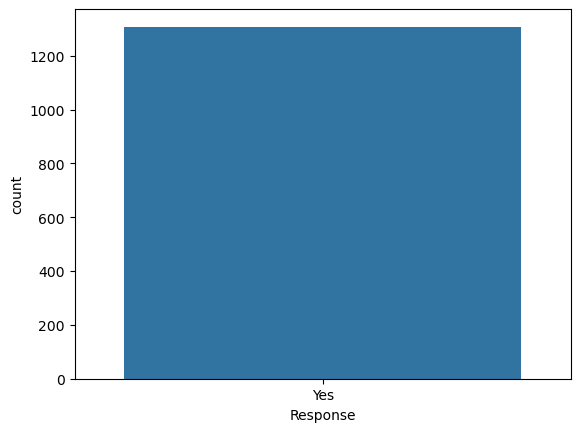

In [13]:
#Show a plot of the total number of responses.
df_yes = df[df['Response'] == 'Yes']
sns.countplot(x='Response', data=df_yes)


<Axes: xlabel='Sales Channel', ylabel='count'>

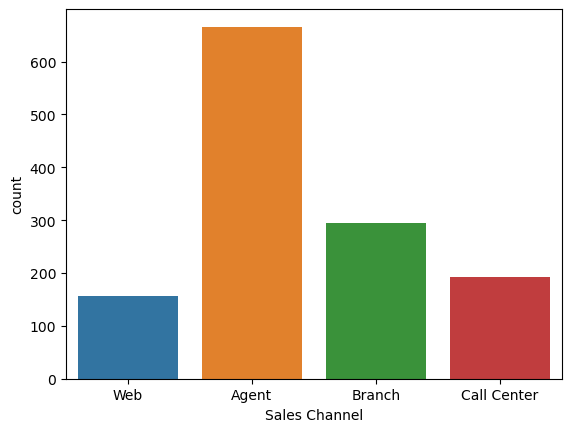

In [45]:
#Show a plot of the response rate by the sales channel.
sns.countplot(x="Sales Channel", data=df_yes)

In [1]:
#Show a plot of the response rate by the total claim amount.




#Show a plot of the response rate by income.

In [15]:
#CUSTOMER ANALYSIS ROUND 4

In [15]:
#Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a 
#dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical 
#data types respectively)
df.dtypes

State                                    object
Customer Lifetime Value                 float64
Response                                 object
Coverage                                 object
Education                                object
Effective To Date                datetime64[ns]
EmploymentStatus                         object
Gender                                   object
Income                                    int64
Location Code                            object
Marital Status                           object
Monthly Premium Auto                      int64
Months Since Last Claim                   int64
Months Since Policy Inception             int64
Number of Open Complaints                 int64
Number of Policies                        int64
Policy Type                              object
Policy                                   object
Renew Offer Type                         object
Sales Channel                            object
Total Claim Amount                      

In [46]:
numerical_data = df.select_dtypes("number")
numerical_data

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Month
Customer,,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147,2
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935,1
AI49188,12887.431650,48767,108,18,38,0,2,566.472247,2
WW63253,7645.861827,0,106,18,65,0,7,529.881344,1
HB64268,2813.692575,43836,73,12,44,0,1,138.130879,2
...,...,...,...,...,...,...,...,...,...
LA72316,23405.987980,71941,73,18,89,0,2,198.234764,2
PK87824,3096.511217,21604,79,14,28,0,1,379.200000,2
TD14365,8163.890428,0,85,9,37,3,2,790.784983,2


In [47]:
categorical_data = df.select_dtypes("object")
categorical_data

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize


Customer Lifetime Value


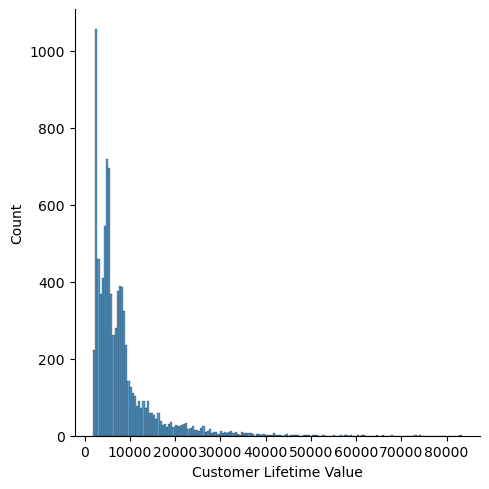

Income


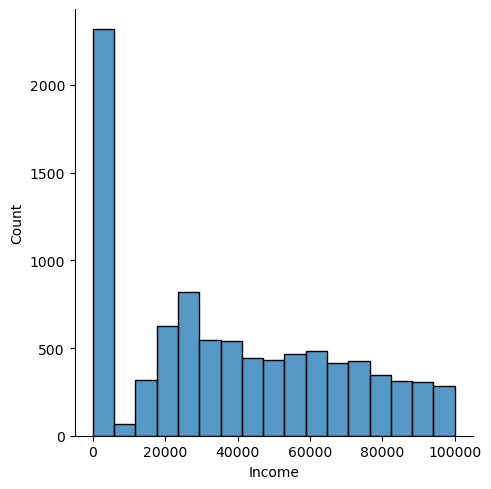

Monthly Premium Auto


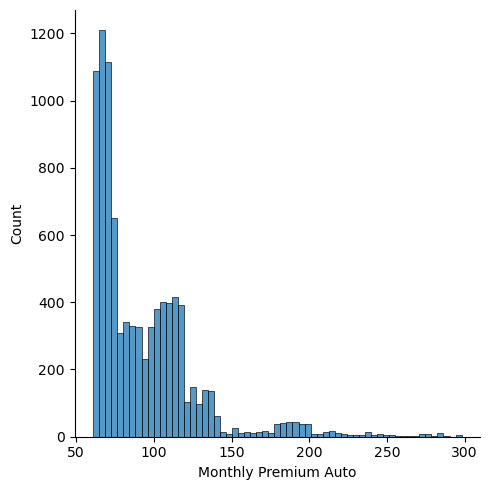

Months Since Last Claim


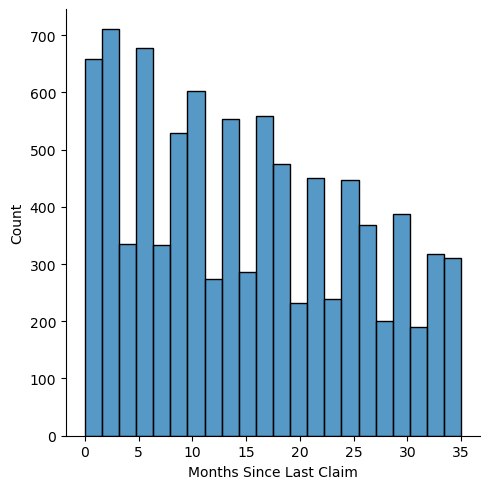

Months Since Policy Inception


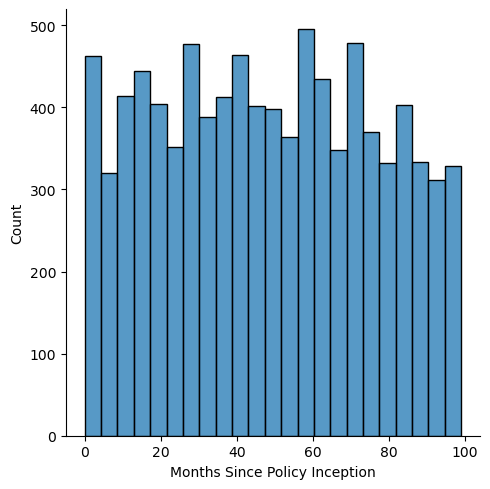

Number of Open Complaints


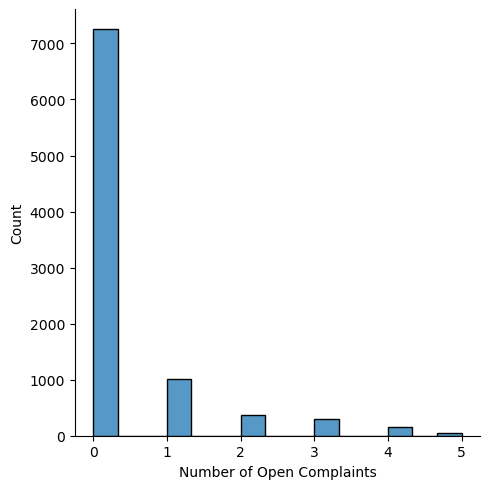

Number of Policies


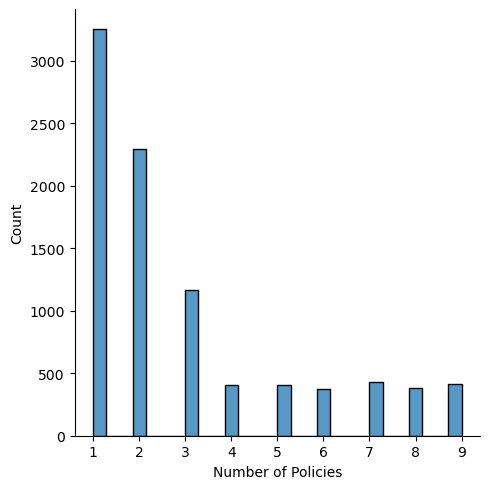

Total Claim Amount


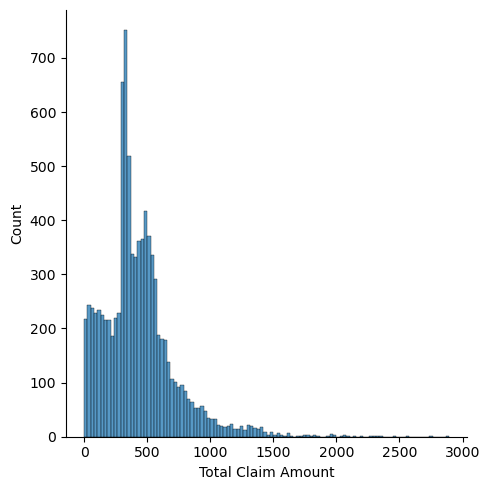

Month


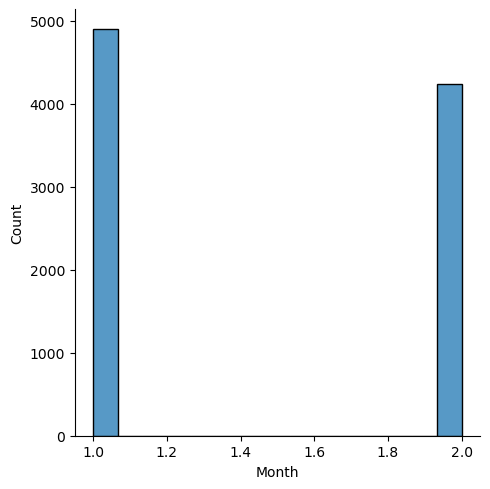

In [48]:
#Use seaborn library to construct distribution plots for the numerical variables
for col in numerical_data.columns:
    print(col)
    sns.displot(numerical_data[col])
    plt.show()

Customer Lifetime Value


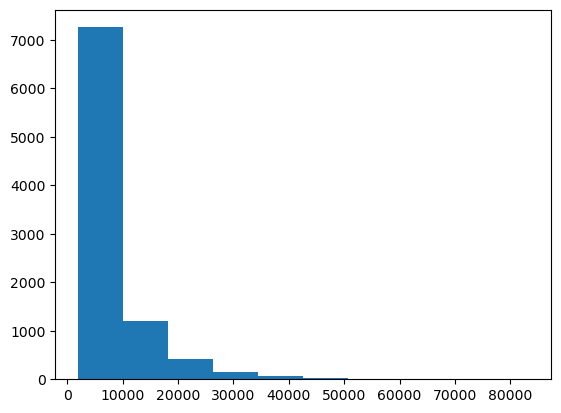

Income


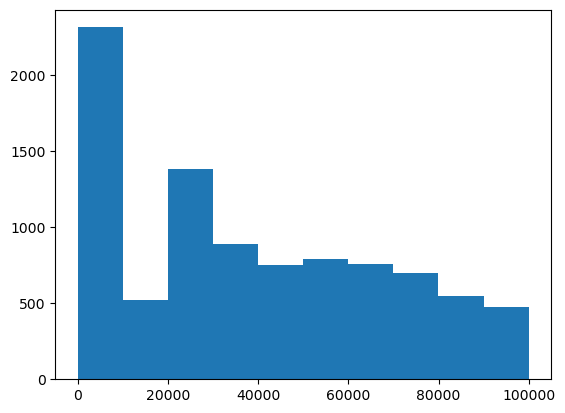

Monthly Premium Auto


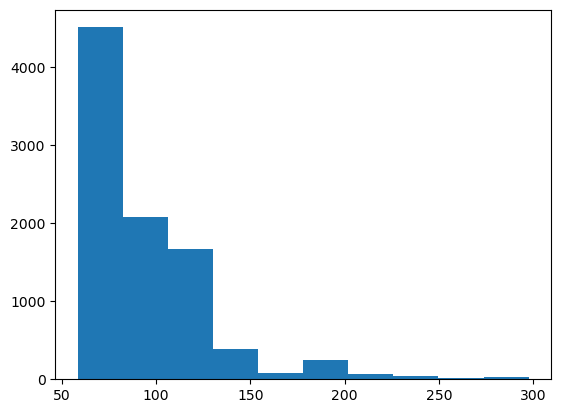

Months Since Last Claim


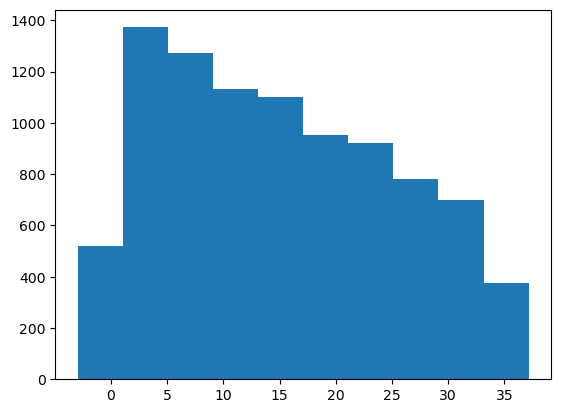

Months Since Policy Inception


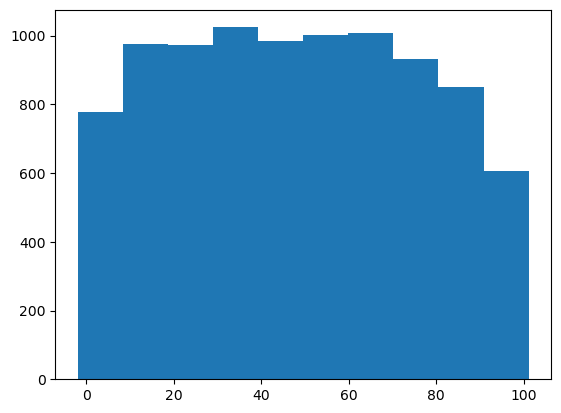

Number of Open Complaints


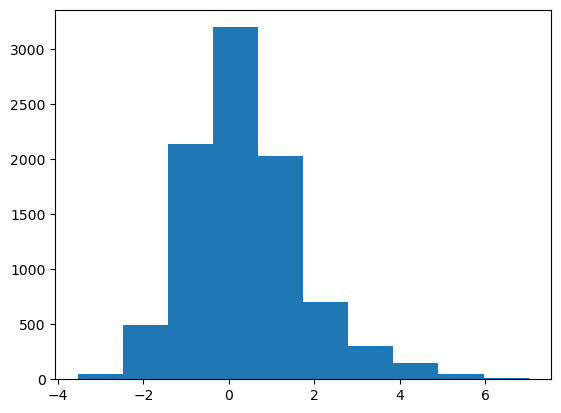

Number of Policies


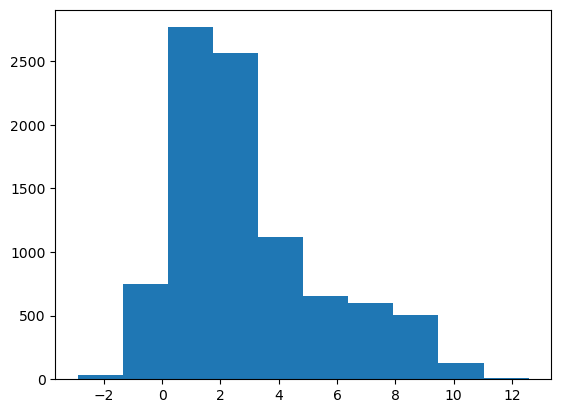

Total Claim Amount


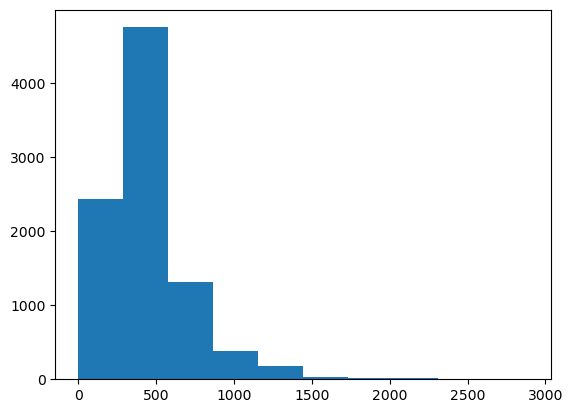

Month


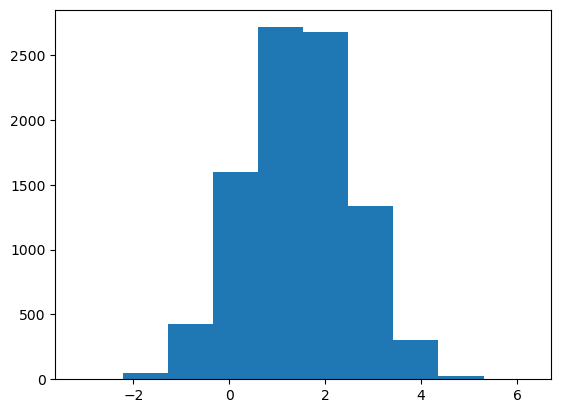

In [19]:
#Use Matplotlib to construct histograms
for col in numerical_data.columns:
    print(col)
    plt.hist(np.random.normal(numerical_data[col]))
    plt.show() 

In [53]:
#Do the distributions for different numerical variables look like a normal distribution
#Response : No they don't have a normal distribution for most of the numerical variables 

In [ ]:
#For the numerical variables, check the multicollinearity between the features.
#Please note that we will use the column total_claim_amount later as the target variable.


In [64]:
#Drop one of the two features that show a high correlation between them (greater than 0.9).
#Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features
#that have a high correlation, then do not drop any features

correlation_matrix = numerical_data.corr()
correlation_matrix

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Month
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451,-0.006096
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254,0.000169
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017,0.011467
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563,-0.020921
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335,0.011010
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241,-0.006335
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354,0.009305
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000,0.006820
Month,-0.006096,0.000169,0.011467,-0.020921,0.011010,-0.006335,0.009305,0.006820,1.000000


In [65]:
correlation_matrix["Total Claim Amount"].sort_values(ascending=False)

Total Claim Amount               1.000000
Monthly Premium Auto             0.632017
Customer Lifetime Value          0.226451
Months Since Last Claim          0.007563
Month                            0.006820
Months Since Policy Inception    0.003335
Number of Policies              -0.002354
Number of Open Complaints       -0.014241
Income                          -0.355254
Name: Total Claim Amount, dtype: float64

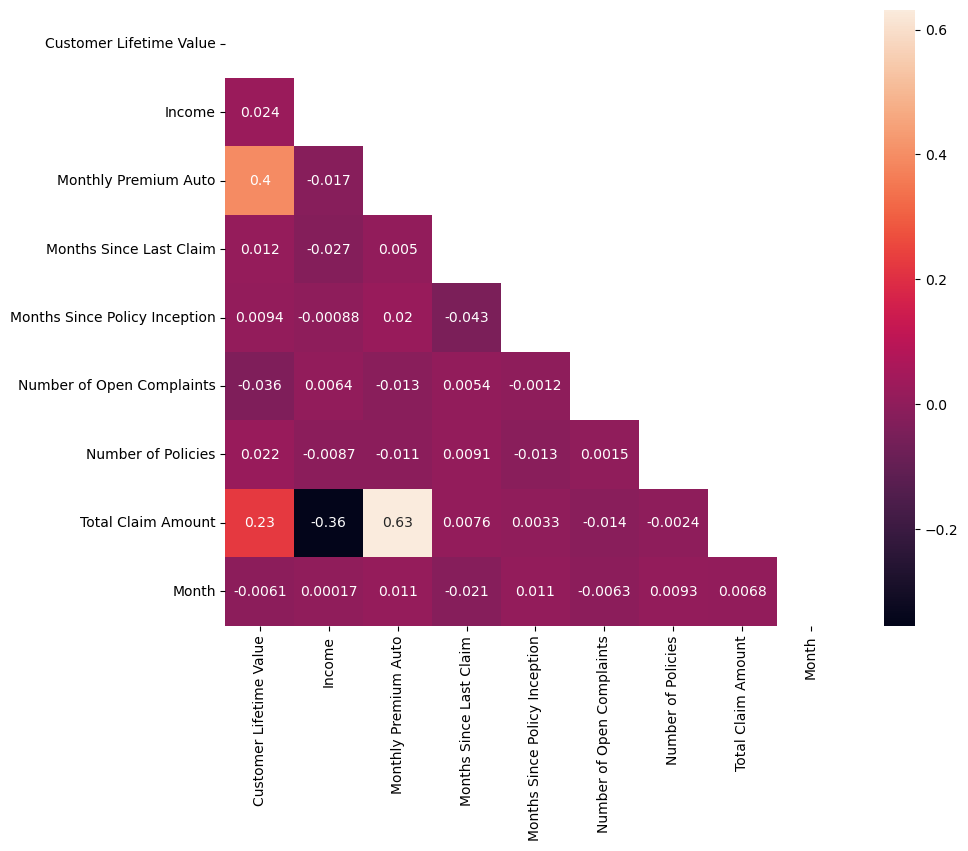

In [66]:
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlation_matrix, mask=mask, annot=True)
plt.show()

In [23]:
#Processing Data (Further processing...)
    #X-y split.
    
#First I display the dataframe
df

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Month
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2
PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2
TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2


In [67]:
#I make a copy to restart from a fresh dataframe and keep my initial one proper 
    
df1 = df.copy()
df1

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Month
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2
PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2
TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2


In [68]:
#I identify the categorical data

df1.select_dtypes("object")

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize


In [88]:
encoder = OneHotEncoder(drop='first')
encoder.fit(df1.select_dtypes("object"))

OneHotEncoder(drop='first')

In [89]:
encoder.transform(df1.select_dtypes("object")).todense()

matrix([[0., 0., 0., ..., 1., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 1., 0., ..., 1., 1., 0.],
        ...,
        [1., 0., 0., ..., 0., 1., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 1., 1., 0.]])

In [91]:
encoder.categories_[1][1:]

array(['Yes'], dtype=object)

In [94]:
cols = list(encoder.categories_[0])[1:] + list(encoder.categories_[1])[1:] + list(encoder.categories_[2])[1:] + list(encoder.categories_[3])[1:] + list(encoder.categories_[4])[1:] + list(encoder.categories_[5])[1:] + list(encoder.categories_[6])[1:] + list(encoder.categories_[7])[1:] + list(encoder.categories_[8])[1:] + list(encoder.categories_[9])[1:] + list(encoder.categories_[10])[1:] + list(encoder.categories_[11])[1:] + list(encoder.categories_[12])[1:] + list(encoder.categories_[13])[1:]
cols

['California',
 'Nevada',
 'Oregon',
 'Washington',
 'Yes',
 'Extended',
 'Premium',
 'College',
 'Doctor',
 'High School or Below',
 'Master',
 'Employed',
 'Medical Leave',
 'Retired',
 'Unemployed',
 'M',
 'Suburban',
 'Urban',
 'Married',
 'Single',
 'Personal Auto',
 'Special Auto',
 'Corporate L2',
 'Corporate L3',
 'Personal L1',
 'Personal L2',
 'Personal L3',
 'Special L1',
 'Special L2',
 'Special L3',
 'Offer2',
 'Offer3',
 'Offer4',
 'Branch',
 'Call Center',
 'Web',
 'Luxury Car',
 'Luxury SUV',
 'SUV',
 'Sports Car',
 'Two-Door Car',
 'Medsize',
 'Small']

In [95]:
df1[cols] = encoder.transform(df1.select_dtypes("object")).todense()
df1

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Branch,Call Center,Web,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Medsize,Small
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [99]:
df1 = df1.drop(df1.select_dtypes("object"), axis=1)
df1

,Customer Lifetime Value,Effective To Date,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Month,...,Branch,Call Center,Web,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Medsize,Small
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,2763.519279,2011-02-24,56274,69,32,5,0,1,384.811147,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
QZ44356,6979.535903,2011-01-31,0,94,13,42,0,8,1131.464935,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
AI49188,12887.431650,2011-02-19,48767,108,18,38,0,2,566.472247,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
WW63253,7645.861827,2011-01-20,0,106,18,65,0,7,529.881344,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
HB64268,2813.692575,2011-02-03,43836,73,12,44,0,1,138.130879,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,23405.987980,2011-02-10,71941,73,18,89,0,2,198.234764,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
PK87824,3096.511217,2011-02-12,21604,79,14,28,0,1,379.200000,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
TD14365,8163.890428,2011-02-06,0,85,9,37,3,2,790.784983,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [102]:
df2 = df.copy()
df2 = pd.get_dummies(df2, drop_first=True)
df2

,Customer Lifetime Value,Effective To Date,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Month,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,2763.519279,2011-02-24,56274,69,32,5,0,1,384.811147,2,...,0,0,0,0,0,0,0,1,1,0
QZ44356,6979.535903,2011-01-31,0,94,13,42,0,8,1131.464935,1,...,0,0,0,0,0,0,0,0,1,0
AI49188,12887.431650,2011-02-19,48767,108,18,38,0,2,566.472247,2,...,0,0,0,0,0,0,0,1,1,0
WW63253,7645.861827,2011-01-20,0,106,18,65,0,7,529.881344,1,...,0,1,0,0,0,1,0,0,1,0
HB64268,2813.692575,2011-02-03,43836,73,12,44,0,1,138.130879,2,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,23405.987980,2011-02-10,71941,73,18,89,0,2,198.234764,2,...,0,0,1,0,0,0,0,0,1,0
PK87824,3096.511217,2011-02-12,21604,79,14,28,0,1,379.200000,2,...,1,0,0,0,0,0,0,0,1,0
TD14365,8163.890428,2011-02-06,0,85,9,37,3,2,790.784983,2,...,1,0,0,0,0,0,0,0,1,0


In [103]:
df2.columns

Index(['Customer Lifetime Value', 'Effective To Date', 'Income',
       'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Total Claim Amount', 'Month', 'State_California',
       'State_Nevada', 'State_Oregon', 'State_Washington', 'Response_Yes',
       'Coverage_Extended', 'Coverage_Premium', 'Education_College',
       'Education_Doctor', 'Education_High School or Below',
       'Education_Master', 'EmploymentStatus_Employed',
       'EmploymentStatus_Medical Leave', 'EmploymentStatus_Retired',
       'EmploymentStatus_Unemployed', 'Gender_M', 'Location Code_Suburban',
       'Location Code_Urban', 'Marital Status_Married',
       'Marital Status_Single', 'Policy Type_Personal Auto',
       'Policy Type_Special Auto', 'Policy_Corporate L2',
       'Policy_Corporate L3', 'Policy_Personal L1', 'Policy_Personal L2',
       'Policy_Personal L3', 'Policy_Special L1', 'Policy_Special L2',
  

In [106]:
#Train-test split.
df1

,Customer Lifetime Value,Effective To Date,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Month,...,Branch,Call Center,Web,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Medsize,Small
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,2763.519279,2011-02-24,56274,69,32,5,0,1,384.811147,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
QZ44356,6979.535903,2011-01-31,0,94,13,42,0,8,1131.464935,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
AI49188,12887.431650,2011-02-19,48767,108,18,38,0,2,566.472247,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
WW63253,7645.861827,2011-01-20,0,106,18,65,0,7,529.881344,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
HB64268,2813.692575,2011-02-03,43836,73,12,44,0,1,138.130879,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,23405.987980,2011-02-10,71941,73,18,89,0,2,198.234764,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
PK87824,3096.511217,2011-02-12,21604,79,14,28,0,1,379.200000,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
TD14365,8163.890428,2011-02-06,0,85,9,37,3,2,790.784983,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [123]:
#I remove the target value from x and keep it in y to separate the target from the features

x = df1.drop(["Total Claim Amount", "Effective To Date"], axis=1)
y = df1["Total Claim Amount"]

In [124]:
#I define the variables x and y to test and train

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [125]:
#Here I can see that y_train gets 70% of the lines

y_train

Customer
JY45873     624.000000
QK23524     628.800000
SK32629     667.200000
EP93369     871.200000
ZX86243     141.799422
              ...     
FX81675     308.321335
ZU30804     350.400000
LA53648    1059.572464
IS30295     667.200000
EH69733     344.015386
Name: Total Claim Amount, Length: 6393, dtype: float64

In [126]:
x_train

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Month,California,Nevada,...,Branch,Call Center,Web,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Medsize,Small
Customer,,,,,,,,,,,,,,,,,,,,,
JY45873,5015.009472,48567,130,12,15,0,1,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
QK23524,5149.301306,26877,131,5,2,0,1,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
SK32629,4904.894731,12902,139,3,51,0,1,2,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
EP93369,8510.525936,0,121,5,94,0,8,1,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
ZX86243,3278.531880,70247,83,13,19,1,1,2,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FX81675,7334.328083,87957,61,31,63,0,2,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
ZU30804,5498.940679,22520,73,17,64,0,3,2,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
LA53648,8992.779137,0,129,13,4,0,7,1,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [127]:
scaler = StandardScaler()

scaler.fit(x_train)

StandardScaler()

In [128]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [129]:
# Start the model object:
lm = LinearRegression()

# Fit the model object on the training set:
lm.fit(x_train_scaled, y_train)

LinearRegression()

In [131]:
# Get predictions for the test set:
predictions = lm.predict(x_test_scaled)

# Calculate your metrics:
rmse = mean_squared_error(y_test, predictions, squared=False) # or mse with squared=True
mae = mean_absolute_error(y_test, predictions)
print("R2_score:", round(r2_score(y_test, predictions), 2)) 
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.77
RMSE: 138.5059951251585
MAE: 94.49429595778169


<Axes: xlabel='Total Claim Amount'>

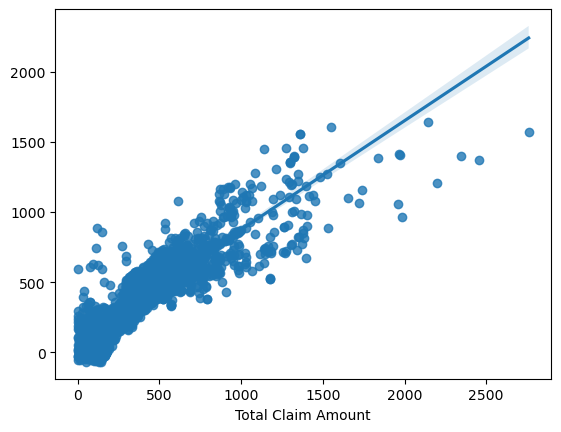

In [132]:
#Improve the linear regression model.

sns.regplot(x=y_test, y=predictions)

In [133]:

y_train_scaled = y_train.apply(lambda x: np.log(x) if x > 0 else 0)
y_test_scaled = y_test.apply(lambda x: np.log(x) if x > 0 else 0)

y_train_scaled

Customer
JY45873    6.436150
QK23524    6.443813
SK32629    6.503090
EP93369    6.769872
ZX86243    4.954414
             ...   
FX81675    5.731143
ZU30804    5.859075
LA53648    6.965621
IS30295    6.503090
EH69733    5.840686
Name: Total Claim Amount, Length: 6393, dtype: float64

C:\Users\mings\AppData\Local\Temp\ipykernel_26616\543638580.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train_scaled, bins=10)


<Axes: xlabel='Total Claim Amount', ylabel='Density'>

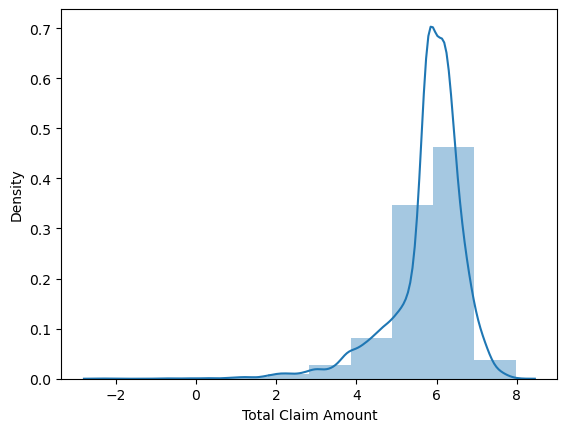

In [134]:
sns.distplot(y_train_scaled, bins=10)

C:\Users\mings\AppData\Local\Temp\ipykernel_26616\37823320.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, bins=10)


<Axes: xlabel='Total Claim Amount', ylabel='Density'>

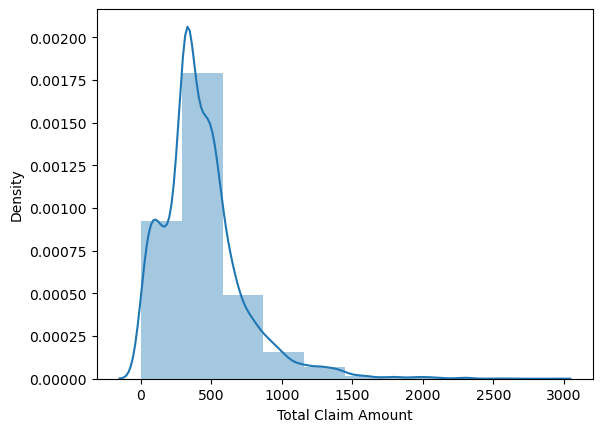

In [135]:
sns.distplot(y_train, bins=10)

In [137]:
lm = LinearRegression()
lm.fit(x_train_scaled, y_train_scaled)

predictions = lm.predict(x_test_scaled)
print("R2_score:", round(r2_score(y_test_scaled, predictions), 2))

R2_score: 0.73


<Axes: xlabel='Total Claim Amount'>

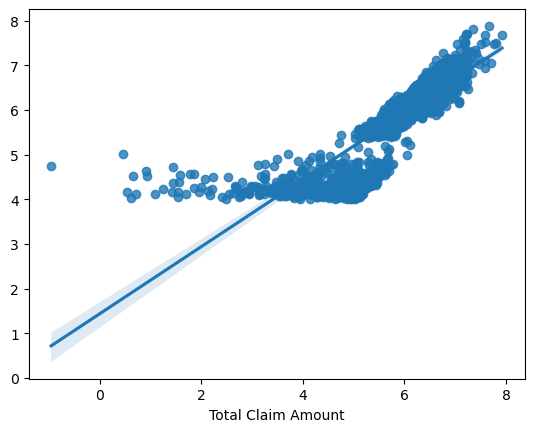

In [138]:
sns.regplot(x=y_test_scaled, y=predictions)

In [139]:
result_df = x_test
result_df["target"] = y_test
result_df["scaled_target"] = y_test_scaled
result_df["error"] = y_test_scaled - predictions
result_df.sort_values("error", ascending=False)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Month,California,Nevada,...,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Medsize,Small,target,scaled_target,error
Customer,,,,,,,,,,,,,,,,,,,,,
NR66922,11323.355550,98254,94,23,11,3,2,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,229.711908,5.436826,1.116529
AT49447,7591.827171,99359,95,16,19,0,9,1,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,233.265397,5.452177,1.099762
NE58217,27064.463390,83560,113,5,76,1,2,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,276.048405,5.620576,1.088111
QF74147,8456.722498,84574,70,13,75,0,2,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,167.459769,5.120743,1.072874
YT96284,3728.873486,83632,94,7,86,4,1,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,216.839496,5.379157,1.067795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FD64348,22563.618380,23046,65,18,7,3,2,1,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.687291,0.523124,-3.627339
WE80653,6827.178202,0,103,2,75,2,6,2,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.455033,0.898140,-3.731127
TK60799,4160.018087,96263,103,5,5,0,1,1,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.924709,0.654775,-3.857916


In [142]:
IQR = abs(np.quantile(df1["Total Claim Amount"], .25) - np.quantile(df1["Total Claim Amount"], .75)) * 1.5
lower_boundary = np.quantile(df1["Total Claim Amount"], .25) - IQR
upper_boundary = np.quantile(df1["Total Claim Amount"], .75) + IQR

# Outliers for this column are values smaller than lower_boundary or bigger than upper_boundary:
lower_boundary, upper_boundary

(-140.62664687499995, 960.3997301249999)

In [144]:
df_final = df1.copy()
df_no_outliers = df_final[df_final["Total Claim Amount"] < 960]
df_no_outliers

,Customer Lifetime Value,Effective To Date,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Month,...,Branch,Call Center,Web,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Medsize,Small
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,2763.519279,2011-02-24,56274,69,32,5,0,1,384.811147,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
AI49188,12887.431650,2011-02-19,48767,108,18,38,0,2,566.472247,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
WW63253,7645.861827,2011-01-20,0,106,18,65,0,7,529.881344,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
HB64268,2813.692575,2011-02-03,43836,73,12,44,0,1,138.130879,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
OC83172,8256.297800,2011-01-25,62902,69,14,94,0,2,159.383042,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,23405.987980,2011-02-10,71941,73,18,89,0,2,198.234764,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
PK87824,3096.511217,2011-02-12,21604,79,14,28,0,1,379.200000,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
TD14365,8163.890428,2011-02-06,0,85,9,37,3,2,790.784983,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [147]:
df_no_outliers[numerical_data.columns] = df_no_outliers[numerical_data.columns].applymap(lambda x: np.log(x) if x > 0 else 0) # this logic will work well as long as we don't have negative values 

df_no_outliers

C:\Users\mings\AppData\Local\Temp\ipykernel_26616\3405650108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[numerical_data.columns] = df_no_outliers[numerical_data.columns].applymap(lambda x: np.log(x) if x > 0 else 0) # this logic will work well as long as we don't have negative values


,Customer Lifetime Value,Effective To Date,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Month,...,Branch,Call Center,Web,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Medsize,Small
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,7.924260,2011-02-24,10.937988,4.234107,3.465736,1.609438,0.000000,0.000000,5.952753,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
AI49188,9.464008,2011-02-19,10.794809,4.682131,2.890372,3.637586,0.000000,0.693147,6.339428,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
WW63253,8.941920,2011-01-20,0.000000,4.663439,2.890372,4.174387,0.000000,1.945910,6.272653,0.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
HB64268,7.942253,2011-02-03,10.688211,4.290459,2.484907,3.784190,0.000000,0.000000,4.928202,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
OC83172,9.018732,2011-01-25,11.049333,4.234107,2.639057,4.543295,0.000000,0.693147,5.071310,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,10.060747,2011-02-10,11.183602,4.290459,2.890372,4.488636,0.000000,0.693147,5.289452,0.693147,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
PK87824,8.038031,2011-02-12,9.980634,4.369448,2.639057,3.332205,0.000000,0.000000,5.938064,0.693147,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
TD14365,9.007476,2011-02-06,0.000000,4.442651,2.197225,3.610918,1.098612,0.693147,6.673026,0.693147,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [158]:
x = df_no_outliers.drop(["Total Claim Amount", "Effective To Date"], axis=1) 
y = df_no_outliers["Total Claim Amount"]

In [159]:

# Train-test split:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [160]:
# Train the model:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [162]:
# Test the model:
predictions = lm.predict(x_test)
print("R2_score:", round(r2_score(y_test, predictions), 2))

R2_score: 0.7


<Axes: xlabel='Total Claim Amount'>

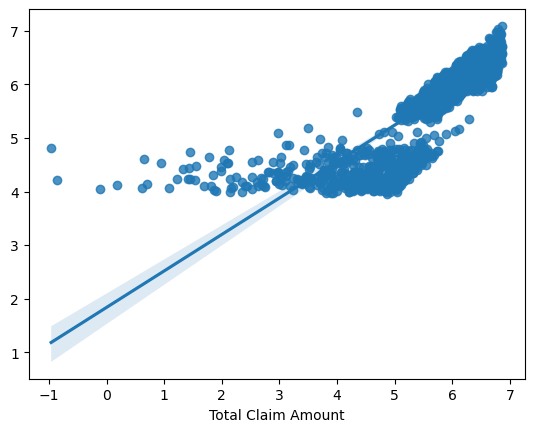

In [163]:
sns.regplot(x=y_test, y=predictions)

In [164]:
y_test_unscaled = y_test.apply(lambda x: np.exp(x))
predictions_unscaled = pd.Series(predictions).apply(lambda x: np.exp(x))

rmse = mean_squared_error(y_test_unscaled, predictions_unscaled, squared=False)
mae = mean_absolute_error(y_test_unscaled, predictions_unscaled)
print("RMSE:", rmse)
print("MAE:", mae)

RMSE: 91.19396764556963
MAE: 69.77830567521796


In [1]:
Our dataset give some information about the customers profile, their insurance who claimed the claim some money to the insurance. 
The target variable is the total claim amount.  It is an important indicator in assessing the financial performance of an insurance 
company. A significant increase in the Total Claim Amount can impact the profitability of the company if claim costs exceed 
collected premiums. Profitability is determined by the difference between collected premiums and the costs incurred for claims and expenses.

Using the data obtained, we want to save some money by focusing on the clients who get the lowest claims for higher premium collected.  

The average total claim amount is 434 euros and the average monthly premium collected is 93 euros (1116 euros per year)

Our results show that our model is not able to accurately analyse our database but has a better capacityu to predict than the previous model. 
To improve our analysis we should dig deeper to understand if some of our variables (with strong correlation) have outliers creating a biais 
with the analysis. 

SyntaxError: invalid syntax (1728320090.py, line 1)